<a href="https://colab.research.google.com/github/emngarcia/TikTokViralSongs/blob/main/analysis_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

aggregate 4 years of data, scrape genius lyrics to add column to dataset, clustering to see if certain types of songs go viral on tik tok, machine learning to predict if new songs will go viral or not on tik tok, make some graphs! potensh generate a new tik tok song that will go viral

to do (chase):
aggregate all of the datasets into one, add columns for each year

to do (liz):
practice scraping some lyrics

In [ ]:
# Joining TikTok CSV files by year into one CSV and saving

import pandas as pd

df_2019 = pd.read_csv("TikTok_songs_2019.csv")
df_2019
df_2019["year"] = 2019
df_2019

df_2020 = pd.read_csv("TikTok_songs_2020.csv")
df_2020
df_2020["year"] = 2020
df_2020

df_2021 = pd.read_csv("TikTok_songs_2021.csv")
df_2021
df_2021["year"] = 2021
df_2021

df_2022 = pd.read_csv("TikTok_songs_2022.csv")
df_2022
df_2022["year"] = 2022
df_2022

df_tiktok = pd.concat([df_2019, df_2020, df_2021, df_2022])
df_tiktok
df_tiktok.to_csv("tiktok_data.csv")
df_tiktok

,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,year
0,Shake It,Metro Station,53,Metro Station,68,0.618,0.955,-3.836,1,4,0.0798,0.002210,0.000003,0.4860,0.790,150.034,4,179947,2019
1,Chinese New Year,SALES,61,SALES - EP,53,0.744,0.845,-7.422,0,4,0.2530,0.759000,0.232000,0.1000,0.749,75.221,4,160000,2019
2,Baby I'm Yours,Breakbot,57,By Your Side,69,0.829,0.792,-3.755,0,2,0.0668,0.726000,0.000006,0.1220,0.758,118.050,4,215507,2019
3,The Git Up,Blanco Brown,60,The Git Up,2,0.847,0.678,-8.635,1,9,0.1090,0.066900,0.000000,0.2740,0.811,97.984,4,200594,2019
4,Say Hey (I Love You),Michael Franti & Spearhead,58,All Rebel Rockers,0,0.738,0.983,-4.374,0,5,0.0855,0.038000,0.000006,0.1830,0.957,92.998,4,235760,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,The Less I Know The Better,Tame Impala,78,Currents,84,0.640,0.740,-4.083,1,4,0.0284,0.011500,0.006780,0.1670,0.785,116.879,4,216320,2022
259,Dandelions,Ruth B.,75,Safe Haven,90,0.609,0.692,-2.958,1,1,0.0259,0.015700,0.000000,0.0864,0.454,116.959,3,233720,2022
260,Jimmy Cooks (feat. 21 Savage),Drake,95,"Honestly, Nevermind",92,0.529,0.673,-4.711,1,0,0.1750,0.000307,0.000002,0.0930,0.366,165.921,4,218365,2022
261,Good Looking,Suki Waterhouse,64,Good Looking,80,0.377,0.558,-9.076,1,4,0.0299,0.078900,0.000342,0.1250,0.267,149.971,3,214800,2022


see how the distribution of clusters change year, make argument that COVID caused a change in the way tiktok is used.

main argument: the way tiktok is used has changed over time largely because of social/societal factors.

In [ ]:
# Reading in CSV with lyrics from Genius API

df = pd.read_csv("merged_right_nodupes.csv")
df

df.drop(columns=['Unnamed: 0'], inplace=True)
df.drop_duplicates(inplace = True, subset = ['lyrics'], keep = 'first')

df

,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,year,lyrics
0,Shake It,Metro Station,53,Metro Station,68,0.618,0.955,-3.836,1,4,0.0798,0.002210,0.000003,0.486,0.7900,150.034,4,179947,2019,"Let’s drop!\nYeah, come on\nShake, shake\n\nI'..."
1,Chinese New Year,SALES,61,SALES - EP,53,0.744,0.845,-7.422,0,4,0.2530,0.759000,0.232000,0.100,0.7490,75.221,4,160000,2019,I'll see you at the movies\nI see you with you...
2,Baby I'm Yours,Breakbot,57,By Your Side,69,0.829,0.792,-3.755,0,2,0.0668,0.726000,0.000006,0.122,0.7580,118.050,4,215507,2019,I thought I had it all together\nBut I was led...
3,The Git Up,Blanco Brown,60,The Git Up,2,0.847,0.678,-8.635,1,9,0.1090,0.066900,0.000000,0.274,0.8110,97.984,4,200594,2019,Right now\nI just need you to get real loose\n...
4,Say Hey (I Love You),Michael Franti & Spearhead,58,All Rebel Rockers,0,0.738,0.983,-4.374,0,5,0.0855,0.038000,0.000006,0.183,0.9570,92.998,4,235760,2019,"Comme da selecta\nAyy, uh-huh, woo (That's rig..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,California Dreaming,Jorm,42,California Dreaming,53,0.717,0.865,-4.126,0,1,0.0307,0.022200,0.001200,0.605,0.4870,124.048,4,152323,2022,All the leaves are brown\nAnd the sky is grey\...
696,Rockstar,Ilkay Sencan,61,Rockstar,69,0.771,0.826,-3.978,1,11,0.0604,0.142000,0.030000,0.145,0.1850,100.012,4,212280,2022,I've been fuckin' hoes and poppin' pillies\nMa...
697,Lovely,Alfons,58,Lovely,45,0.504,0.677,-6.954,0,4,0.0640,0.316000,0.001270,0.268,0.0375,128.078,4,159023,2022,Одинокий прекрасный\nВ синем небе парил\nПрола...
698,Jimmy Cooks (feat. 21 Savage),Drake,95,"Honestly, Nevermind",92,0.529,0.673,-4.711,1,0,0.1750,0.000307,0.000002,0.093,0.3660,165.921,4,218365,2022,"Вновь проснулся бодреньким, так что знай: я в ..."


In [ ]:
# Reading in CSV with lyrics, clusters, and duplicates removed
# Relabeling each cluster with its assigned description

clusters_df = pd.read_csv("merged_right_nodupes_clusters.csv")
clusters_df

clusters_df.drop(columns=['Unnamed: 0'], inplace=True)

cluster_labels = {
    0: 'High-Energy Dance Music',
    1: 'Indie & Electronic',
    2: 'Nostalgic Pop',
    3: 'Rap & Viral Memes',
    4: 'Heartbreak & Emotional Songs'
}

clusters_df['Cluster'] = clusters_df['Cluster'].replace(cluster_labels)

clusters_df

,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,year,lyrics,Cluster
0,Shake It,Metro Station,53,Metro Station,68,0.618,0.955,-3.836,1,4,...,0.002210,0.000003,0.486,0.7900,150.034,4,179947,2019,"Let’s drop!\nYeah, come on\nShake, shake\n\nI'...",High-Energy Dance Music
1,Chinese New Year,SALES,61,SALES - EP,53,0.744,0.845,-7.422,0,4,...,0.759000,0.232000,0.100,0.7490,75.221,4,160000,2019,I'll see you at the movies\nI see you with you...,Nostalgic Pop
2,Baby I'm Yours,Breakbot,57,By Your Side,69,0.829,0.792,-3.755,0,2,...,0.726000,0.000006,0.122,0.7580,118.050,4,215507,2019,I thought I had it all together\nBut I was led...,Nostalgic Pop
3,The Git Up,Blanco Brown,60,The Git Up,2,0.847,0.678,-8.635,1,9,...,0.066900,0.000000,0.274,0.8110,97.984,4,200594,2019,Right now\nI just need you to get real loose\n...,High-Energy Dance Music
4,Say Hey (I Love You),Michael Franti & Spearhead,58,All Rebel Rockers,0,0.738,0.983,-4.374,0,5,...,0.038000,0.000006,0.183,0.9570,92.998,4,235760,2019,"Comme da selecta\nAyy, uh-huh, woo (That's rig...",Nostalgic Pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,California Dreaming,Jorm,42,California Dreaming,53,0.717,0.865,-4.126,0,1,...,0.022200,0.001200,0.605,0.4870,124.048,4,152323,2022,All the leaves are brown\nAnd the sky is grey\...,Nostalgic Pop
696,Rockstar,Ilkay Sencan,61,Rockstar,69,0.771,0.826,-3.978,1,11,...,0.142000,0.030000,0.145,0.1850,100.012,4,212280,2022,I've been fuckin' hoes and poppin' pillies\nMa...,High-Energy Dance Music
697,Lovely,Alfons,58,Lovely,45,0.504,0.677,-6.954,0,4,...,0.316000,0.001270,0.268,0.0375,128.078,4,159023,2022,Одинокий прекрасный\nВ синем небе парил\nПрола...,Nostalgic Pop
698,Jimmy Cooks (feat. 21 Savage),Drake,95,"Honestly, Nevermind",92,0.529,0.673,-4.711,1,0,...,0.000307,0.000002,0.093,0.3660,165.921,4,218365,2022,"Вновь проснулся бодреньким, так что знай: я в ...",High-Energy Dance Music


In [ ]:
# Importing necessary tools for WordCloud generation and creating custom_tokenizer for lyrics

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def custom_tokenizer(lyrics):
  pattern = r"\b\w+(?:'\w+)?\b"
  return re.findall(pattern, lyrics.lower())

vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer, stop_words="english")

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



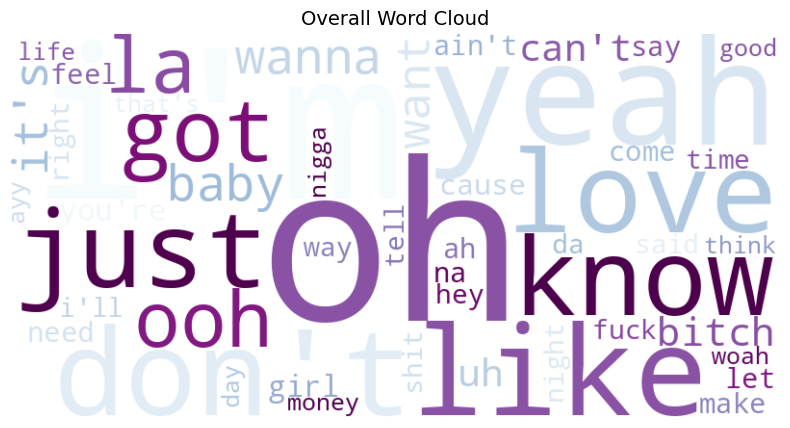

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



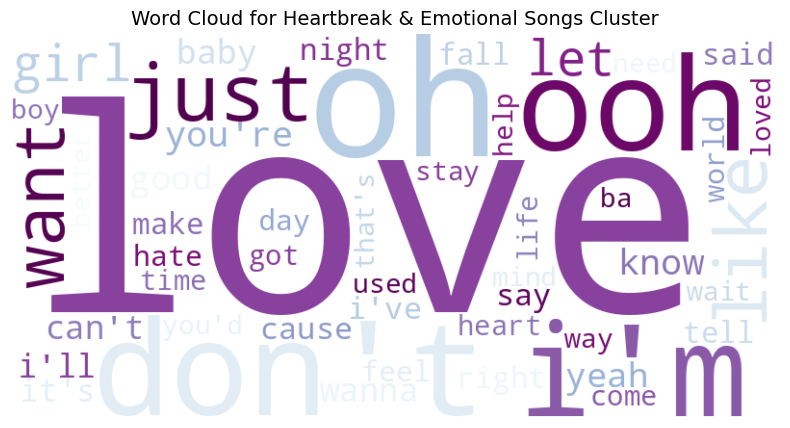

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



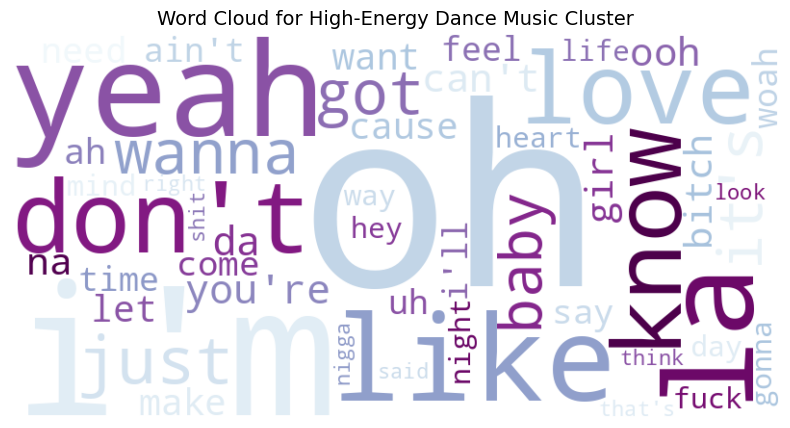

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



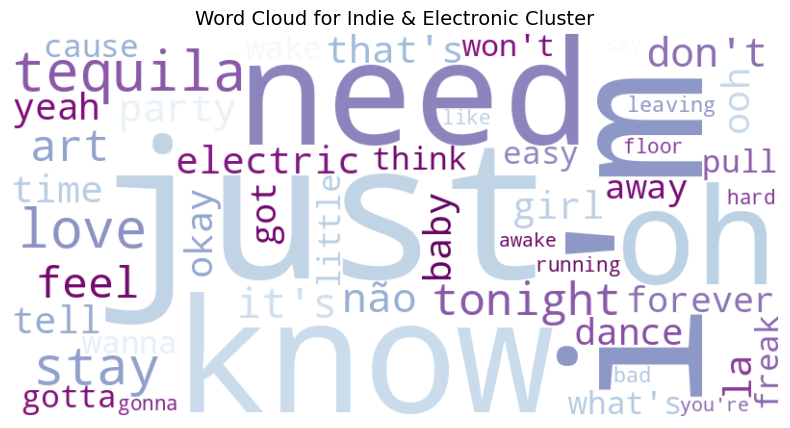

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



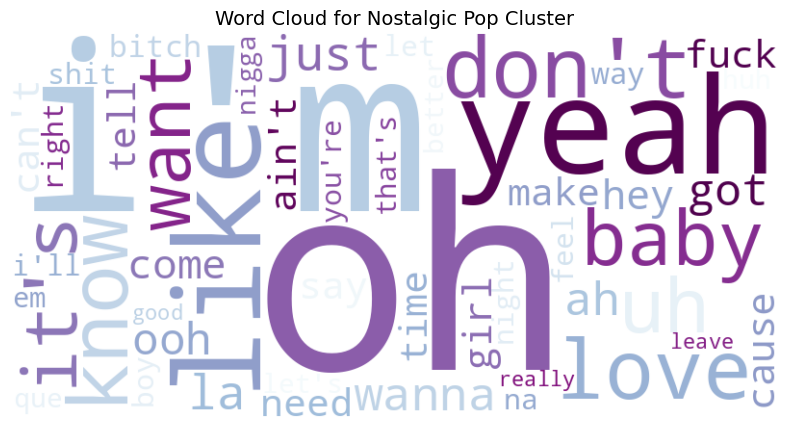

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



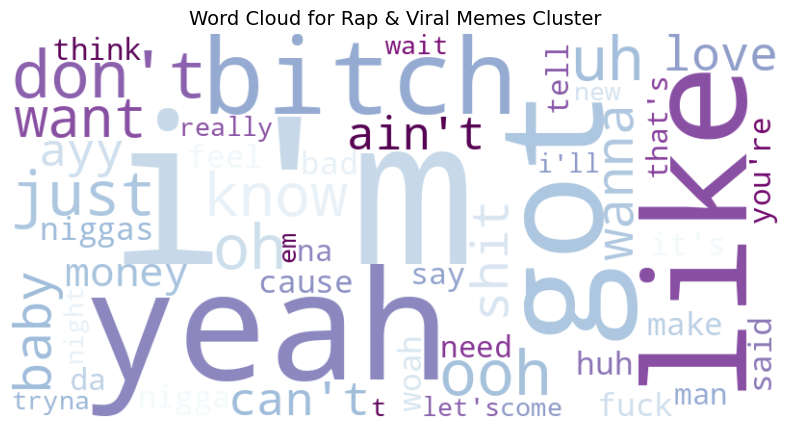

In [ ]:
# Generating WordClouds for overall lyrics and for each cluster

lyrics_matrix = vectorizer.fit_transform(clusters_df["lyrics"] )
word_counts = pd.DataFrame(lyrics_matrix.toarray(), columns=vectorizer.get_feature_names_out())
word_frequencies = word_counts.sum().sort_values(ascending=False).head(50).to_dict()

wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="BuPu").generate_from_frequencies(word_frequencies)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Overall Word Cloud", fontsize=14)
plt.show()

def plot_wordcloud(cluster_number, lyrics_text):
    lyrics_matrix = vectorizer.fit_transform(lyrics_text)
    word_counts = pd.DataFrame(lyrics_matrix.toarray(), columns=vectorizer.get_feature_names_out())
    word_frequencies = word_counts.sum().sort_values(ascending=False).head(50).to_dict()

    wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="BuPu").generate_from_frequencies(word_frequencies)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for {cluster_number} Cluster", fontsize=14)
    plt.show()

for cluster in sorted(clusters_df["Cluster"].unique()):
    cluster_lyrics = clusters_df[clusters_df["Cluster"] == cluster]["lyrics"]
    plot_wordcloud(cluster, cluster_lyrics)

In [ ]:
# Generating radar chart for key features of each cluster

import plotly.graph_objects as go

features = ['energy', 'loudness', 'danceability', 'speechiness', 'acousticness', 'instrumentalness']

clusters_df['loudness'] = (clusters_df['loudness'] + 60) / 60

fig = go.Figure()

cluster_colors = {
    'Heartbreak & Emotional Songs': '#c2ddf2',
    'High-Energy Dance Music': '#93179c',
    'Indie & Electronic': '#802ebf',
    'Nostalgic Pop': '#5244d4',
    'Rap & Viral Memes': '#769ee3'
}

for cluster_name in sorted(clusters_df['Cluster'].unique()):
    cluster_data = clusters_df[clusters_df['Cluster'] == cluster_name][features].mean()

    values = cluster_data.tolist()
    values.append(values[0])

    fig.add_trace(go.Scatterpolar(
        r=values,
        theta=features + [features[0]],
        fill='toself',
        name=cluster_name,
        line=dict(color=cluster_colors[cluster_name]),
        opacity=0.5
    ))

fig.update_layout(
    title="Feature Comparison Across Clusters",
    polar=dict(
        bgcolor="rgba(0,0,0,0)",
        radialaxis=dict(visible=True, range=[0, 1], gridcolor='lightgrey'),
        angularaxis=dict(gridcolor='lightgrey')
    ),
    showlegend=True
)

fig.show()

In [ ]:
# Reading in CSV with lyrics, clusters, and duplicates kept

dupes_clusters_df = pd.read_csv("merged_right_withdupes_clusters.csv")
dupes_clusters_df

dupes_clusters_df.drop(columns=['Unnamed: 0'], inplace=True)

dupes_clusters_df

,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,year,lyrics,Cluster
0,Shake It,Metro Station,53,Metro Station,68,0.618,0.955,-3.836,1,4,...,0.002210,0.000003,0.486,0.7900,150.034,4,179947,2019,"Let’s drop!\nYeah, come on\nShake, shake\n\nI'...",0.0
1,Chinese New Year,SALES,61,SALES - EP,53,0.744,0.845,-7.422,0,4,...,0.759000,0.232000,0.100,0.7490,75.221,4,160000,2019,I'll see you at the movies\nI see you with you...,2.0
2,Chinese New Year,SALES,61,Chinese New Year,66,0.744,0.845,-7.422,0,4,...,0.759000,0.232000,0.100,0.7490,75.221,4,160000,2020,I'll see you at the movies\nI see you with you...,2.0
3,Baby I'm Yours,Breakbot,57,By Your Side,69,0.829,0.792,-3.755,0,2,...,0.726000,0.000006,0.122,0.7580,118.050,4,215507,2019,I thought I had it all together\nBut I was led...,2.0
4,Baby I'm Yours,Breakbot,57,By Your Side,69,0.829,0.792,-3.755,0,2,...,0.726000,0.000006,0.122,0.7580,118.050,4,215507,2020,I thought I had it all together\nBut I was led...,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,California Dreaming,Jorm,42,California Dreaming,53,0.717,0.865,-4.126,0,1,...,0.022200,0.001200,0.605,0.4870,124.048,4,152323,2022,All the leaves are brown\nAnd the sky is grey\...,2.0
840,Rockstar,Ilkay Sencan,61,Rockstar,69,0.771,0.826,-3.978,1,11,...,0.142000,0.030000,0.145,0.1850,100.012,4,212280,2022,I've been fuckin' hoes and poppin' pillies\nMa...,0.0
841,Lovely,Alfons,58,Lovely,45,0.504,0.677,-6.954,0,4,...,0.316000,0.001270,0.268,0.0375,128.078,4,159023,2022,Одинокий прекрасный\nВ синем небе парил\nПрола...,2.0
842,Jimmy Cooks (feat. 21 Savage),Drake,95,"Honestly, Nevermind",92,0.529,0.673,-4.711,1,0,...,0.000307,0.000002,0.093,0.3660,165.921,4,218365,2022,"Вновь проснулся бодреньким, так что знай: я в ...",0.0


In [ ]:
# Generating bar plot to represent the proportion of each cluster for each year

import plotly.express as px

cluster_labels = {
    0: '1. High-Energy Dance Music',
    1: '2. Indie & Electronic',
    2: '3. Nostalgic Pop',
    3: '4. Rap & Viral Memes',
    4: '5. Heartbreak & Emotional Songs'
}

dupes_clusters_df['Cluster'] = dupes_clusters_df['Cluster'].replace(cluster_labels)

df_counts = dupes_clusters_df.groupby(['year', 'Cluster']).size().reset_index(name='count')

df_counts['proportion'] = df_counts.groupby('year')['count'].transform(lambda x: x / x.sum())

df_counts['year'] = df_counts['year'].astype(str)
df_counts['Cluster'] = df_counts['Cluster'].astype(str)

custom_colors = {
    '1. High-Energy Dance Music': '#93179c',
    '2. Indie & Electronic': '#802ebf',
    '3. Nostalgic Pop': '#5244d4',
    '4. Rap & Viral Memes': '#769ee3',
    '5. Heartbreak & Emotional Songs': '#c2ddf2'
}

fig = px.bar(df_counts, x='year', y='proportion', color='Cluster',
             title='Cluster Proportions Over Time', labels={'proportion': 'Proportion', 'year': 'Year'},
             text_auto=False, barmode='stack', category_orders={"year": sorted(df_counts['year'].unique())},
             color_discrete_map=custom_colors)

fig.show()